<a href="https://colab.research.google.com/github/SainzayaBaasankhuu/Data-Science-Projects/blob/main/NLP2%E2%80%95%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%862.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Topic 0: 0.048*"food" + 0.047*"loved" + 0.028*"wait" + 0.028*"average" + 0.028*"hype"
Topic 1: 0.047*"food" + 0.047*"return" + 0.047*"experience" + 0.047*"ever" + 0.028*"service"


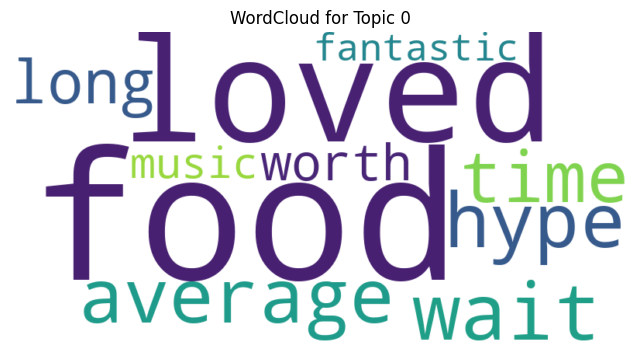

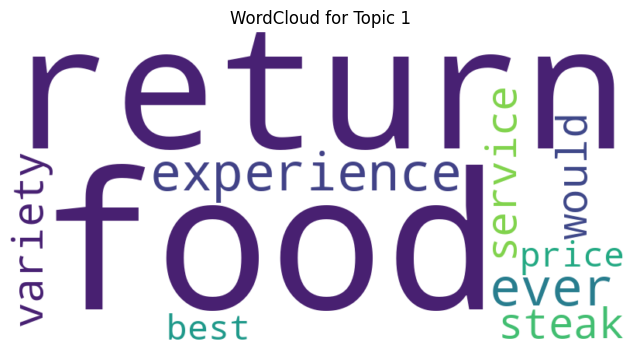

In [ ]:
# Download NLTK resources only (no pip installs)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Import libraries (preinstalled in Colab)
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample data
data = [
    "The customer service was excellent and staff was very helpful.",
    "Terrible experience, the food was cold and service was slow.",
    "Loved the ambiance, but the food was overpriced.",
    "Horrible! Will never return, worst experience ever!",
    "Great variety of food options, and reasonable prices!",
    "The waiter was rude and ignored our requests.",
    "Fantastic place for a family dinner, highly recommend!",
    "Not worth the hype, average food, long wait times.",
    "Loved the live music, but seating arrangement was uncomfortable.",
    "Best steak I've ever had, would definitely return!"
]

# Preprocessing (no punkt needed)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    words = text.split()  # avoids punkt/punkt_tab
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

data_processed = [preprocess_text(text) for text in data]

# Topic Modeling with fixed random seed
dictionary = corpora.Dictionary(data_processed)
corpus = [dictionary.doc2bow(text) for text in data_processed]
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10, random_state=42)

# Print topics
for idx, topic in lda_model.show_topics(formatted=True, num_words=5):
    print(f"Topic {idx}: {topic}")

# WordClouds with fixed random layout
for i in range(2):
    plt.figure(figsize=(8, 6))
    topic_words = dict(lda_model.show_topic(i, 10))
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate_from_frequencies(topic_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for Topic {i}")
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Topic 0: 0.007*"government" + 0.006*"key" + 0.006*"state" + 0.005*"armenian" + 0.004*"law"
Topic 1: 0.012*"game" + 0.012*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.008*"team" + 0.006*"year" + 0.005*"player"
Topic 2: 0.008*"dont" + 0.008*"god" + 0.006*"say" + 0.005*"thing" + 0.004*"right"
Topic 3: 0.008*"file" + 0.007*"window" + 0.007*"system" + 0.006*"image" + 0.005*"program"
Topic 4: 0.006*"space" + 0.004*"year" + 0.003*"system" + 0.003*"may" + 0.003*"car"


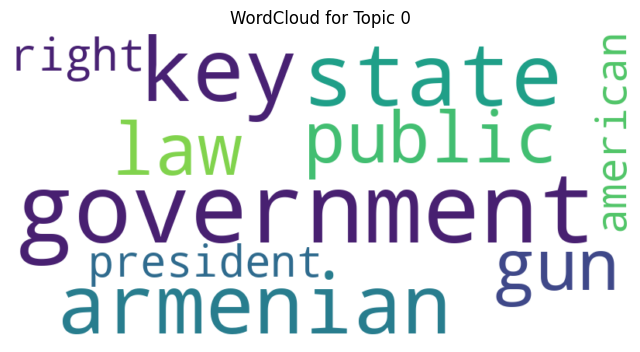

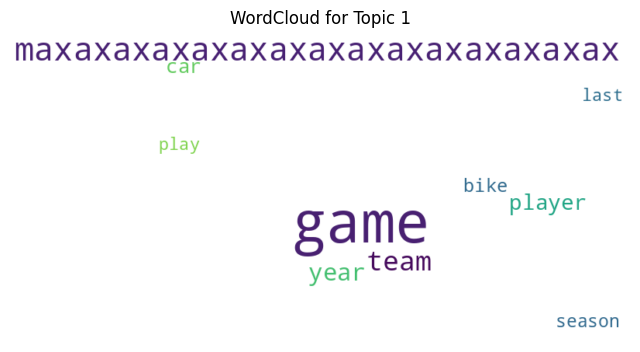

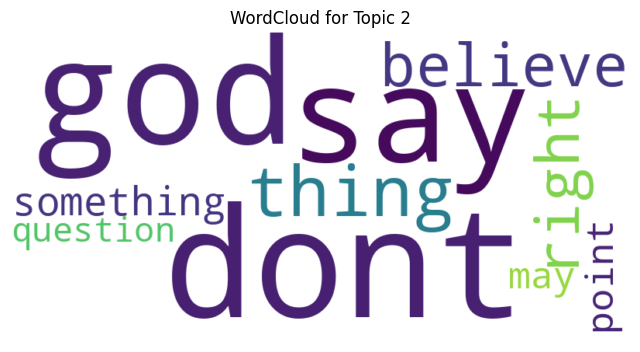

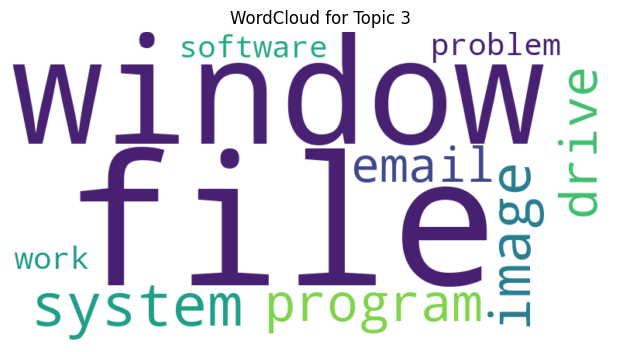

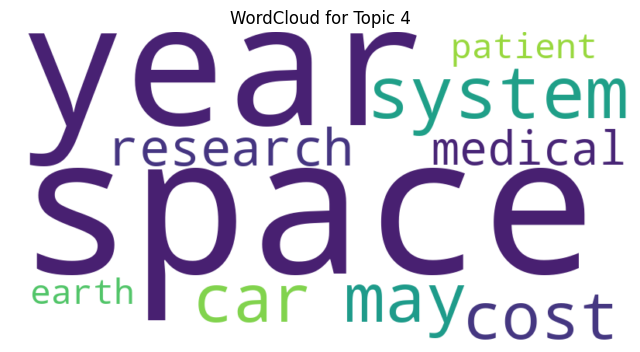

In [ ]:
# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Import required libraries (no pip installs needed)
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Set global random seed for reproducibility
np.random.seed(42)

# Load and clean 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame({'text': newsgroups_data.data, 'target': newsgroups_data.target})
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
df['category'] = df['target'].apply(lambda x: newsgroups_data.target_names[x])

# Define and apply preprocessing
stop_words = set(stopwords.words('english'))
custom_stopwords = set([
    "said", "like", "would", "one", "also", "could", "use", "even", "get",
    "many", "really", "go", "much", "see", "way", "make", "think", "know",
    "want", "well", "time", "new", "good", "people", "first", "two", "used", "since"
])
stop_words.update(custom_stopwords)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    words = text.split()  # avoids punkt/tokenizer errors
    words = [word for word in words if word not in stop_words and len(word) > 2]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(preprocess_text)

# Topic modeling (LDA) with fixed random seed
texts = df['clean_text'].str.split()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Show topics
for idx, topic in lda_model.show_topics(formatted=True, num_words=5):
    print(f"Topic {idx}: {topic}")

# Visualize WordClouds (with reproducible layout)
for i in range(num_topics):
    plt.figure(figsize=(8, 6))
    topic_words = dict(lda_model.show_topic(i, 10))
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate_from_frequencies(topic_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for Topic {i}")
    plt.show()

True Category   0    1    2    3    4    5    6    7    8    9    10   11  \
LDA Topic                                                                   
0               34   26   43   25   45   12   39   81   40   47   34  431   
1               12    7   21    2    4    1  139  223  329  637  759    6   
2              736   87   64   35   73   37   53  369  488  263  180  353   
3               10  835  850  892  812  936  600  138   81   41   24  179   
4                7   18    7   28   29    2  144  179   58    6    2   22   

True Category   12   13   14   15   16   17   18   19  
LDA Topic                                              
0               48   40   77   31  239  484  162   38  
1               23   10   11    2   16   11    3    9  
2              116  424  320  946  633  432  584  561  
3              542   47   89   16    9    8    7    7  
4              255  469  490    2   13    5   19   13  


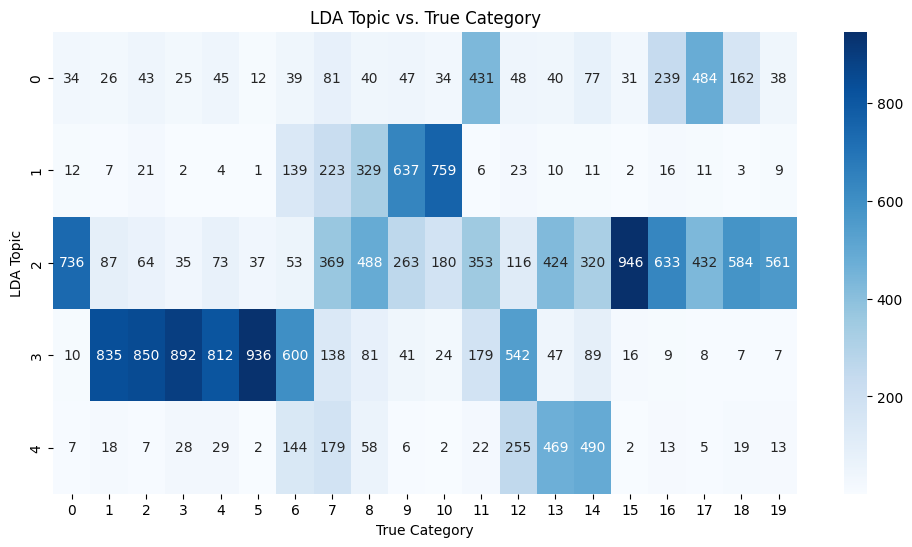

In [ ]:
# Assign documents to most likely topic
doc_topics = [max(lda_model[corpus[i]], key=lambda x: x[1])[0] for i in range(len(corpus))]
df['lda_topic'] = doc_topics
# Comparison table
comparison = pd.crosstab(df['lda_topic'], df['target'], rownames=['LDA Topic'], colnames=['True Category'])
print(comparison)
#  Visualize the comparison as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(comparison, cmap="Blues", annot=True, fmt="d", cbar=True)
plt.title("LDA Topic vs. True Category")
plt.ylabel("LDA Topic")
plt.xlabel("True Category")
plt.show()

In [ ]:
print(newsgroups_data.target_names)
print(len(newsgroups_data.data))
# Count documents per category
category_counts = pd.Series(newsgroups_data.target).value_counts().sort_index()
category_names = newsgroups_data.target_names
# Display counts
for i, count in enumerate(category_counts):
    print(f"{category_names[i]:<25} : {count}")

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
18846
alt.atheism               : 799
comp.graphics             : 973
comp.os.ms-windows.misc   : 985
comp.sys.ibm.pc.hardware  : 982
comp.sys.mac.hardware     : 963
comp.windows.x            : 988
misc.forsale              : 975
rec.autos                 : 990
rec.motorcycles           : 996
rec.sport.baseball        : 994
rec.sport.hockey          : 999
sci.crypt                 : 991
sci.electronics           : 984
sci.med                   : 990
sci.space                 : 987
soc.religion.christian    : 997
talk.politics.guns        : 910
talk.politics.mideast     : 940
talk.politics.misc      